About The Dataset  
1. id    :unique id of the news article   
2. title :the title of a news article  
3. author : author of the news article  
4. text  : the text of the article may be incomplete
5. label : a lable that marks whether the news articles is real or fake  


1: fake news  

0: real news

Importing the Dependencies

In [27]:
# Numerical computing library (used for arrays, math ops, etc.)
import numpy as np

# Data manipulation library (DataFrame, Series, CSV handling, etc.)
import pandas as pd

# Regular expressions library (for cleaning text data, e.g., removing symbols, punctuation, etc.)
import re

# NLTK(Natural lanuage tool kit) stopwords (list of common words like "is", "the", "and" which don’t add much meaning)
from nltk.corpus import stopwords

# Porter Stemmer (used to reduce words to their root form, e.g., "running" → "run")
from nltk.stem.porter import PorterStemmer

# TF-IDF Vectorizer (converts text into numerical features based on word importance)
from sklearn.feature_extraction.text import TfidfVectorizer

# Train-test split (splits dataset into training and testing subsets)
from sklearn.model_selection import train_test_split

# Logistic Regression (machine learning algorithm used for classification)
from sklearn.linear_model import LogisticRegression

# Accuracy score (metric to evaluate model performance)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# seeing what stopwords do
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Data pre-processing  

In [30]:
# loading dataset to pandas data frame

news_dataset =pd.read_csv('/content/train.csv')

In [31]:
# seeing the dataset size (row and col)
news_dataset.shape

(20800, 5)

In [32]:
# printing the first five row of dataset
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [33]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [34]:
# since our dataset is large so we are replacing the null values with empty string

news_dataset =news_dataset.fillna('')

In [35]:
# merging the author name and news title
news_dataset['content']=news_dataset['author']+' '+news_dataset['title']

In [36]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


this is just for understanding

In [37]:
# seperating the data and label

X=news_dataset.drop(columns='label',axis=1)
Y=news_dataset['label']

In [38]:
print(X)
print(Y)

          id  ...                                            content
0          0  ...  Darrell Lucus House Dem Aide: We Didn’t Even S...
1          1  ...  Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2          2  ...  Consortiumnews.com Why the Truth Might Get You...
3          3  ...  Jessica Purkiss 15 Civilians Killed In Single ...
4          4  ...  Howard Portnoy Iranian woman jailed for fictio...
...      ...  ...                                                ...
20795  20795  ...  Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796  20796  ...  Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797  20797  ...  Michael J. de la Merced and Rachel Abrams Macy...
20798  20798  ...  Alex Ansary NATO, Russia To Hold Parallel Exer...
20799  20799  ...            David Swanson What Keeps the F-35 Alive

[20800 rows x 5 columns]
0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 2080

Stemming :   
stemming is the process of reducing a word to  its Root word   

example:  
actor ,actress ,acting -->act



In [39]:
port_stem=PorterStemmer()

In [40]:
def stemming (content):
  stemmed_content =re.sub('[^a-zA-Z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)
  return stemmed_content

Examle :

content = "Learning machines are running faster than humans in 2025!!!"  

1. re.sub('[^a-zA-Z]', ' ', text)  # Regular expressions library (for cleaning text data, e.g., removing symbols, punctuation,number etc.)   

   "Learning machines are running faster than humans in "  

2. "Learning machines are running faster than humans in ".lower()  

    "learning machines are running faster than humans in "  

3. "learning machines are running faster than humans in ".split()  

    ['learning', 'machines', 'are', 'running', 'faster', 'than', 'humans', 'in']  

4. [port_stem.stem(word) for word in words if word not in stopwords('english')]   

    "learning" → "learn"

    "machines" → "machin"

    "running" → "run"

    "faster" → "faster" (stemmer keeps as is)

    "humans" → "human"  


5. ' '.join(['learn', 'machin', 'run', 'faster', 'human'])   

      "learn machin run faster human"  







In [41]:
news_dataset['content']=news_dataset['content'].apply(stemming)

In [42]:
print (news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [43]:
# seperating the data and label

X=news_dataset['content'].values
Y=news_dataset['label'].values

In [44]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [45]:
print(Y)

[1 0 1 ... 0 1 1]


Now since computer not undestand the text so will will convet textual data into numerical data using **TfidVectorizer**  (Term Frequency – Inverse Document Frequency

And TfidfVectorizer in scikit-learn is the tool that converts raw text into numerical feature vectors using this method.)   


TfidfVectorizer converts text into a matrix of TF-IDF features, making it suitable for ML models.

In [46]:
# converting the textual data to numerical data

vectorizer=TfidfVectorizer()
vectorizer.fit(X)

X=vectorizer.transform(X)

In [47]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 210687 stored elements and shape (20800, 17128)>
  Coords	Values
  (0, 267)	0.2701012497770876
  (0, 2483)	0.36765196867972083
  (0, 2959)	0.24684501285337127
  (0, 3600)	0.3598939188262558
  (0, 3792)	0.27053324808454915
  (0, 4973)	0.23331696690935097
  (0, 7005)	0.2187416908935914
  (0, 7692)	0.24785219520671598
  (0, 8630)	0.2921251408704368
  (0, 8909)	0.36359638063260746
  (0, 13473)	0.2565896679337956
  (0, 15686)	0.2848506356272864
  (1, 1497)	0.2939891562094648
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 2813)	0.19094574062359204
  (1, 3568)	0.26373768806048464
  (1, 5503)	0.7143299355715573
  (1, 6816)	0.1904660198296849
  (1, 16799)	0.30071745655510157
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 3643)	0.2115550061362374
  (20797, 7042)	0.21799048897828685
  (2079

splitting the dataset to training and test data

In [48]:
# splitting the dataset to training and test data

X_train ,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

Now training our logistic regression model

In [49]:
model=LogisticRegression()

In [50]:
model.fit(X_train,Y_train)

LogisticRegression()

In [51]:
# Evaluating the model

# accuracy score on training data
X_train_prediction=model.predict(X_train)
training_data_acccuracy=accuracy_score(X_train_prediction,Y_train)



In [52]:
print("Accuracy score on training data ",training_data_acccuracy)

Accuracy score on training data  0.9863581730769231


making confusion matrix


In [56]:
cm = confusion_matrix(Y_train, X_train_prediction)

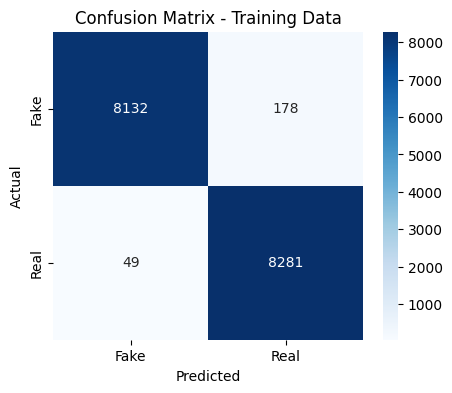

In [57]:
# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Training Data")
plt.show()

In [53]:
# predicting the model for test data
X_test_prediction=model.predict(X_test)
test_data_acccuracy=accuracy_score(X_test_prediction,Y_test)

In [54]:
print("Accuracy score on training data ",test_data_acccuracy)

Accuracy score on training data  0.9790865384615385


confusion matrix on test data

In [61]:
cm=confusion_matrix(Y_test,X_test_prediction)

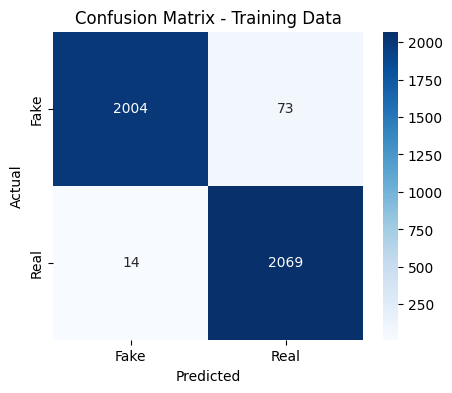

In [62]:
# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Training Data")
plt.show()

Making a Predicting System

In [55]:
X_new=X_test[0] # taking a random news to check from test news data

prediction=model.predict(X_new)
print(prediction)

if(prediction[0]==0):
  print("News is Real")
else:
  print("News is fake")

[1]
News is fake
